In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-range-prediction-is2020/test_data.csv
/kaggle/input/mobile-price-range-prediction-is2020/train_data.csv
/kaggle/input/mobile-price-range-prediction-is2020/sample_submission.csv


In [3]:
import pandas as pd
dtrain=pd.read_csv('/kaggle/input/mobile-price-range-prediction-is2020/train_data.csv')
dtest=pd.read_csv('/kaggle/input/mobile-price-range-prediction-is2020/test_data.csv')


In [4]:
for i in dtrain.columns:
    best=pd.isnull(dtrain[i])

In [5]:
for i in dtrain.columns:
    print(i,dtrain[i].corr(dtrain['price_range'],method='pearson'))

id 0.07432494058846037
battery_power 0.19977472591351608
bluetooth 0.0070276493860737975
clock_speed -0.02360882122046087
dual_sim 0.033223751165211125
fc 0.0066895741557281415
four_g -0.014062231166131272
int_memory 0.045099923747952686
m_dep 0.004626289162717977
mobile_wt -0.03618336424488205
n_cores 0.005606316832081759
pc 0.03132698258578304
px_height 0.1429683338245217
px_width 0.16223668727716742
ram 0.9181278691092608
sc_h 0.04393644471378209
sc_w 0.05038590986206462
talk_time 0.003860293815511481
three_g -0.011163004179341336
touch_screen -0.05558367912407939
wifi 0.02364540691570372
price_range 1.0


In [6]:
dtrain.loc[dtrain['price_range']==3.0].head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,13,1370,0,1.4,0,5,1,6,0.2,158,...,1392,1783,3703,13,10,11,1,1,0,3
18,19,1461,0,2.4,1,3,1,40,0.5,141,...,1265,1298,3799,16,1,4,1,0,0,3
21,22,1709,1,2.1,0,1,0,13,1.0,156,...,974,1385,3283,17,1,15,1,0,0,3
25,26,1809,0,0.5,0,6,0,23,0.7,123,...,433,1661,2784,12,6,20,1,1,1,3
28,29,911,0,1.4,1,3,0,14,0.7,199,...,1563,1692,2933,16,3,11,0,1,0,3


In [7]:
dtrain.corr(method='pearson')

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,1.000000,-0.017888,0.039517,-0.007143,0.042364,-0.023668,0.026765,0.005055,-0.030100,-0.015375,...,-0.055966,-0.022062,0.085181,-0.049846,0.005038,-0.012680,0.019161,0.027277,-0.021613,0.074325
battery_power,-0.017888,1.000000,-0.009722,0.013782,-0.038118,0.028987,0.013888,0.017102,0.035654,0.010051,...,-0.009281,-0.012174,0.002308,-0.021093,-0.014305,0.053070,0.001044,-0.011932,0.002977,0.199775
bluetooth,0.039517,-0.009722,1.000000,0.048849,0.015732,-0.006819,-0.004243,0.026852,-0.014753,-0.012159,...,-0.010394,-0.026192,0.021981,0.001132,0.006462,0.008109,-0.042413,0.020011,-0.008539,0.007028
clock_speed,-0.007143,0.013782,0.048849,1.000000,0.016023,-0.015817,-0.018427,0.001168,-0.001278,0.015822,...,-0.007240,-0.009153,-0.018537,-0.041655,-0.003870,-0.000545,-0.036774,0.047538,-0.015943,-0.023609
dual_sim,0.042364,-0.038118,0.015732,0.016023,1.000000,-0.014529,0.005358,-0.002839,-0.012519,-0.004204,...,0.001877,0.035297,0.054281,-0.005962,-0.025245,-0.025067,-0.021806,0.012777,0.024017,0.033224
fc,-0.023668,0.028987,-0.006819,-0.015817,-0.014529,1.000000,-0.024292,-0.032420,-0.014980,0.009810,...,0.005093,0.002306,0.003369,-0.016715,0.017254,-0.003747,0.006780,-0.015656,0.023149,0.006690
four_g,0.026765,0.013888,-0.004243,-0.018427,0.005358,-0.024292,1.000000,0.021652,-0.046392,-0.003872,...,-0.006616,0.004212,-0.027073,0.036611,0.033876,-0.057975,0.585576,0.021215,-0.030788,-0.014062
int_memory,0.005055,0.017102,0.026852,0.001168,-0.002839,-0.032420,0.021652,1.000000,0.003740,-0.064406,...,-0.022913,-0.027686,0.031367,0.037378,0.003192,-0.008424,0.001022,-0.012379,-0.001295,0.045100
m_dep,-0.030100,0.035654,-0.014753,-0.001278,-0.012519,-0.014980,-0.046392,0.003740,1.000000,0.023530,...,0.036436,0.031457,-0.010590,-0.018608,-0.017211,0.014483,-0.038137,-0.005053,-0.032952,0.004626
mobile_wt,-0.015375,0.010051,-0.012159,0.015822,-0.004204,0.009810,-0.003872,-0.064406,0.023530,1.000000,...,0.021290,-0.001010,-0.004049,-0.018891,-0.029113,-0.026996,0.010162,-0.014373,-0.002674,-0.036183


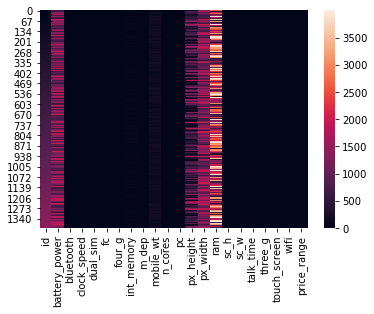

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dtrain)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X=dtrain.drop(['price_range'],axis=1)
Y=dtrain['price_range']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import math
clf=LinearRegression()
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
ypred=[]
for i in range(len(y_pred)):
    ypred.append(int(y_pred[i]))
accuracy_score(ytest,ypred)
asc=accuracy_score(ytest,ypred)
mse=mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
print(asc,mse,rmse)

0.6166666666666667 0.38333333333333336 0.6191391873668903


In [11]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression() 
clf.fit(xtrain,ytrain) 
ypred =clf.predict(xtest) 
ypred=[]
for i in range(len(y_pred)):
    ypred.append(int(y_pred[i]))
accuracy_score(ytest, ypred) 
asc=accuracy_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred) 
rmse = math.sqrt(mse) 
print(asc,mse,rmse)
np=clf.predict(dtest.drop(['id'],axis=1)) 

0.6166666666666667 0.38333333333333336 0.6191391873668903


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: X has 20 features per sample; expecting 21

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(xtrain,ytrain)
ypred = dtree.predict(xtest)
accuracy_score(ytest, ypred)
asc=accuracy_score(ytest, ypred)
mse =mean_squared_error(ytest, ypred)
rmse = math.sqrt(mse)
print(asc,mse,rmse) 
np2=clf.predict(dtest.drop(['id'],axis=1)) 

0.85 0.15 0.3872983346207417


ValueError: X has 20 features per sample; expecting 21

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
y_pred_knn = model_knn.predict(xtest)

In [18]:
from sklearn import metrics
print(metrics.confusion_matrix(ytest, y_pred_knn))

[[105   7   0   0]
 [  6  93   4   0]
 [  0  10  77   9]
 [  0   0  13  96]]


In [19]:
acc_knn = accuracy_score(ytest, y_pred_knn)
acc_knn

0.8833333333333333

In [20]:
predicted_price_range = model_knn.predict(dtest)

In [21]:
predicted_price_range

array([3, 3, 1, 1, 3, 2, 0, 0, 2, 3, 1, 1, 0, 1, 0, 2, 3, 1, 3, 2, 3, 2,
       2, 0, 3, 2, 1, 3, 2, 3, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 3, 1, 2, 3,
       0, 2, 3, 3, 2, 3, 1, 0, 0, 2, 0, 2, 1, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 0, 2,
       3, 2, 1, 2, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 3, 3, 2,
       1, 1, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 1, 0, 1, 1, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 3, 2, 0, 3, 1, 2, 3,
       1, 1, 0, 3, 1, 2, 3, 1, 0, 3, 0, 0, 3, 1, 0, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 3, 2, 2, 0, 3, 3, 1, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 3, 0, 2, 1, 2, 3, 0, 2, 3, 0, 2, 3, 0, 3, 3, 1, 2, 2, 1, 2, 2,
       3, 0, 2, 2, 2, 1, 2, 3, 0, 2, 1, 0, 2, 2, 3, 1, 3, 0, 1, 3, 1, 2,
       0, 1, 3, 0, 1, 3, 3, 0, 3, 0, 2, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2, 0,
       3, 2, 2, 2, 1, 2, 1, 3, 3, 1, 0, 3, 0, 3, 2, 2, 3, 1, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2,

In [24]:
dtest['price_range'] = predicted_price_range

In [25]:
dtest.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1401,1572,1,0.8,1,7,1,8,0.8,169,...,577,1237,3461,6,3,10,1,1,1,3
1,1402,707,0,2.1,1,2,0,25,0.8,131,...,495,574,3838,9,2,7,1,0,1,3
2,1403,983,0,0.6,1,0,1,45,0.1,130,...,948,1205,2052,5,3,6,1,0,1,1
3,1404,827,1,0.6,1,9,1,35,0.2,87,...,23,826,2367,5,3,15,1,0,1,1
4,1405,1975,1,1.9,1,2,0,31,0.9,151,...,775,1607,3022,13,5,19,0,0,1,3


In [30]:
prediction = pd.DataFrame(predicted_price_range, columns=['price_range']).to_csv('sample_submission.csv')

In [29]:
prediction